<font size="3">Importing Required Libraries

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [1]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random
from sklearn.metrics import recall_score , precision_score , f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
sm = str.maketrans('','',punctuation)
sm

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [3]:
my_text = 'hello ! what is name?'
my_text.translate(sm)

'hello  what is name'

In [4]:
word_tokenize(my_text)

['hello', '!', 'what', 'is', 'name', '?']

In [5]:
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

<font size="3">preprocessing on negative reviews</font>

In [6]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('','',punctuation)
        tokens = [word.translate(translator) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        documents = ' '.join(tokens)
        negative_documents.append(documents)
len(negative_documents)

1000

In [7]:
max_len_negative

1400

<font size="3">preprocessing on positive reviews</font>


In [8]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('','' , punctuation)
        tokens = [word.translate(translator) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        documents = ' '.join(tokens)
        positive_documents.append(documents)
len(positive_documents)

1000

In [9]:
max_len_positive

1693

In [10]:
max_len = max(max_len_negative , max_len_positive)
max_len

1693

<font size="3">train text</font>


In [11]:
x_train = negative_documents[:800] + positive_documents[:800]

<font size="3">target sentiment analysis</font>


In [12]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]
len(y_train)

1600

<font size="3">test text</font>


In [13]:
x_test =negative_documents[800:] +  positive_documents[800:]
len(x_test)

400

<font size="3">test data target sentiment analysis</font>


In [14]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]
len(y_test)

400

<font size=3>Tokenizer Function Documentation

The Tokenizer function from Keras is used to process text data for deep learning models, particularly in the context of natural language processing (NLP). It converts text into sequences of integers, which are easier for models to process. Below is a detailed explanation of the steps and workflow for this process.

Process:

1. Tokenizer(): This initializes the tokenizer object from Keras.

Purpose: Prepares the tokenizer for processing text. It is responsible for tokenizing text into words and converting these words into integers.



2. fit_on_texts(x_train): This method processes the x_train data and creates an internal word index that maps each word to a unique integer.</font>

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
tokenizer

In [16]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'time': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'also': 12,
 'character': 13,
 'get': 14,
 'characters': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'could': 21,
 'really': 22,
 'make': 23,
 'little': 24,
 'films': 25,
 'life': 26,
 'plot': 27,
 'people': 28,
 'bad': 29,
 'scene': 30,
 'best': 31,
 'man': 32,
 'never': 33,
 'new': 34,
 'scenes': 35,
 'many': 36,
 'know': 37,
 'movies': 38,
 'another': 39,
 'great': 40,
 'director': 41,
 'action': 42,
 'go': 43,
 'love': 44,
 'us': 45,
 'end': 46,
 'back': 47,
 'something': 48,
 'still': 49,
 'seems': 50,
 'work': 51,
 'world': 52,
 'made': 53,
 'however': 54,
 'makes': 55,
 'big': 56,
 'every': 57,
 'though': 58,
 'better': 59,
 'enough': 60,
 'audience': 61,
 'seen': 62,
 'real': 63,
 'around': 64,
 'performance': 65,
 'take': 66,
 'going': 67,
 'think': 68,
 'may': 69,
 'role': 70,
 'gets': 71,
 'things': 72,
 'actually': 73

In [17]:
len(tokenizer.word_index)

40523

In [18]:
vocab_len = len(tokenizer.word_index) + 1
vocab_len

40524

<font size="3">texts_to_sequences Function Documentation

The texts_to_sequences function from the Keras Tokenizer class is used to convert a list of texts into a list of sequences of integers. These sequences represent the tokenized form of the input texts. This process is essential for text preprocessing in natural language processing (NLP) tasks where text needs to be transformed into numerical format for machine learning models.

Process:

texts_to_sequences(x_train):

The Tokenizer object, after being fitted on the texts (as shown in the previous fit_on_texts method), converts each word in the x_train text data into its corresponding integer index from the word index created during tokenization.

The function returns a list of lists, where each inner list represents the sequence of integer tokens corresponding to each input text.</font

In [19]:
encoded = tokenizer.texts_to_sequences(x_train)
encoded[0]

[27,
 16,
 831,
 4229,
 43,
 2237,
 751,
 3407,
 1381,
 14,
 1215,
 4,
 384,
 1171,
 553,
 1406,
 18,
 26,
 4060,
 512,
 131,
 3,
 10267,
 86,
 1978,
 12926,
 3,
 831,
 1258,
 2049,
 544,
 240,
 1559,
 29,
 3635,
 55,
 323,
 6,
 3636,
 4,
 1071,
 87,
 1185,
 9281,
 25,
 416,
 732,
 6524,
 763,
 292,
 208,
 3516,
 7379,
 7,
 29,
 620,
 144,
 2774,
 25,
 1584,
 2,
 18158,
 4,
 6163,
 132,
 481,
 151,
 3408,
 1200,
 2566,
 2238,
 366,
 3,
 20,
 217,
 214,
 200,
 7380,
 325,
 1072,
 18159,
 1125,
 52,
 61,
 978,
 240,
 67,
 875,
 15,
 417,
 47,
 248,
 349,
 77,
 5,
 248,
 585,
 12927,
 15063,
 23926,
 758,
 35,
 4230,
 1278,
 72,
 467,
 200,
 1887,
 2435,
 2,
 204,
 139,
 8547,
 1,
 57,
 146,
 2567,
 14,
 138,
 4061,
 1,
 759,
 214,
 468,
 176,
 56,
 653,
 2861,
 50,
 147,
 2861,
 202,
 235,
 413,
 119,
 23,
 72,
 326,
 2862,
 6,
 1609,
 5025,
 22,
 1279,
 102,
 4062,
 5026,
 1497,
 5,
 73,
 3764,
 1888,
 109,
 10268,
 317,
 23,
 24,
 152,
 148,
 49,
 2,
 23,
 1,
 326,
 474,
 1735,
 224,
 

<font size="3">pad sequence</font>

In [20]:
padded = pad_sequences(encoded , maxlen=max_len , padding='post')
padded

array([[   27,    16,   831, ...,     0,     0,     0],
       [  563,  2952,   868, ...,     0,     0,     0],
       [   38,     5,    23, ...,     0,     0,     0],
       ...,
       [   62,   203,    36, ...,     0,     0,     0],
       [22772,  4546,    17, ...,     0,     0,     0],
       [ 1784,   155,  6868, ...,     0,     0,     0]])

In [21]:
padded.shape

(1600, 1693)

<font size="3">model sequence</font>

In [22]:
input1 = Input(shape = (max_len,))
embedding1 = Embedding(vocab_len , 100)(input1)
dropout1 = Dropout(0.2)(embedding1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(dropout1)
maxpool1 = MaxPool1D(pool_size=2)(conv1)
flatten = Flatten()(maxpool1)
dense2 = Dense(64, activation='relu')(flatten)
dropout2 = Dropout(0.2)(dense2)
dense3 = Dense(10, activation='relu')(dropout2)
dropout3 = Dropout(0.5)(dense3)
output = Dense(1 , activation='sigmoid')(dropout3)

In [23]:
model = Model(inputs=[input1] , outputs=output)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding (Embedding)       (None, 1693, 100)         4052400   
                                                                 
 dropout (Dropout)           (None, 1693, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, 1690, 32)          12832     
                                                                 
 max_pooling1d (MaxPooling1  (None, 845, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 27040)             0         
                                                             

In [25]:
model.compile(optimizer=Adam(learning_rate=0.001) , loss='binary_crossentropy' , metrics=['accuracy'])

<font size="3">tokenization and pad sequence on test data</font

In [26]:
encoded_test = tokenizer.texts_to_sequences(x_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [27]:
padded_test.shape

(400, 1693)

<font size=3>### Callbacks in Model Training

In deep learning, callbacks are a way to customize the training process by monitoring and taking actions based on the performance during training. Below are the callbacks used in this model:

#### 1. Early Stopping
This callback monitors the validation loss and stops training if the loss does not improve after a specified number of epochs (patience). It helps to avoid overfitting by preventing unnecessary training when the model has reached its best performance.

`python
early_stop = EarlyStopping(monitor='val_loss', patience=50, mode='min')

monitor='val_loss': Monitors the validation loss during training.

patience=8: Stops training if no improvement in validation loss after 50 epochs.

mode='min': The training will stop when the monitored value (validation loss) has stopped decreasing.


2. Reduce Learning Rate on Plateau

This callback reduces the learning rate by a specified factor if the validation loss plateaus for a certain number of epochs. It helps to fine-tune the model's performance after initial improvements.

rlop = ReduceLROnPlateau(monitor='val_loss', patience=50, factor=0.2, min_lr=0.001)

monitor='val_loss': Monitors the validation loss to detect when to reduce the learning rate.

patience=7: Number of epochs with no improvement before reducing the learning rate.

factor=0.5: The factor by which the learning rate will be reduced.

min_lr=0.001: The lower bound for the learning rate.


3. Model Checkpoint

This callback saves the best model based on the lowest validation loss during training, ensuring that the best performing model is retained.

check_point = ModelCheckpoint('best_text_model2.h5', monitor='val_loss', mode='min', save_best_only=True)

monitor='val_loss': Saves the model with the lowest validation loss.

mode='min': Monitors when the validation loss is minimized.

save_best_only=True: Saves only the best model (with the lowest validation loss).


Final Integration in Training

These callbacks are then passed into the model.fit() method, ensuring they are used during training:

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stop, rlop, check_point])

Using these callbacks, the training process is optimized, ensuring the model's best performance while avoiding overfitting and unnecessary training</font>

In [28]:
early_stop = EarlyStopping(monitor='val_loss' , patience=8, mode='min' )
rlop = ReduceLROnPlateau(monitor='val_loss' , patience=7, factor=0.5 , min_lr=0.001)
check_point =  ModelCheckpoint('best_text_model2.h5' , monitor='val_loss' , model='min' , save_best_only=True)

<font size="5"><b>fiting the model</b></font>

In [29]:
history = model.fit([padded], np.array(y_train), epochs=20, batch_size=50, validation_data=([padded_test], np.array(y_test)) , callbacks=[early_stop , check_point , rlop])

Epoch 1/20
32/32 [==============================] - 5s 144ms/step - loss: 0.6970 - accuracy: 0.4944 - val_loss: 0.6917 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 2/20


c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 5s 143ms/step - loss: 0.6914 - accuracy: 0.5163 - val_loss: 0.6886 - val_accuracy: 0.5675 - lr: 0.0010
Epoch 3/20
32/32 [==============================] - 5s 147ms/step - loss: 0.6763 - accuracy: 0.5269 - val_loss: 0.6827 - val_accuracy: 0.6175 - lr: 0.0010
Epoch 4/20
32/32 [==============================] - 5s 144ms/step - loss: 0.6340 - accuracy: 0.6250 - val_loss: 0.6360 - val_accuracy: 0.6425 - lr: 0.0010
Epoch 5/20
32/32 [==============================] - 5s 154ms/step - loss: 0.5239 - accuracy: 0.7750 - val_loss: 0.5416 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 6/20
32/32 [==============================] - 5s 157ms/step - loss: 0.3349 - accuracy: 0.8969 - val_loss: 0.4286 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 7/20
32/32 [==============================] - 4s 137ms/step - loss: 0.1727 - accuracy: 0.9531 - val_loss: 0.6684 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 8/20
32/32 [==============================] - 4s 137ms/step - loss: 0.0815 

<font size="3">visualization train loss and validation loss</font>


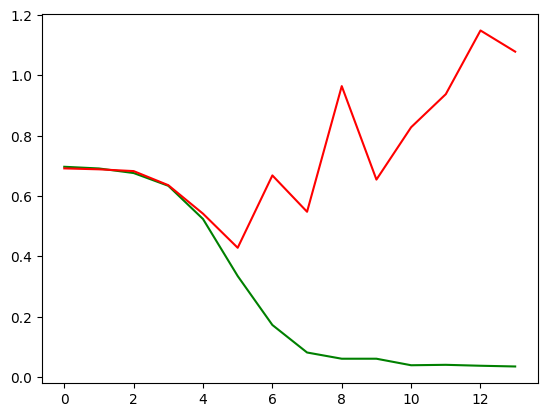

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , c='g')
plt.plot(history.history['val_loss'] , c='r')

<font size="3">visualization train accuracy and validation accuracy</font>


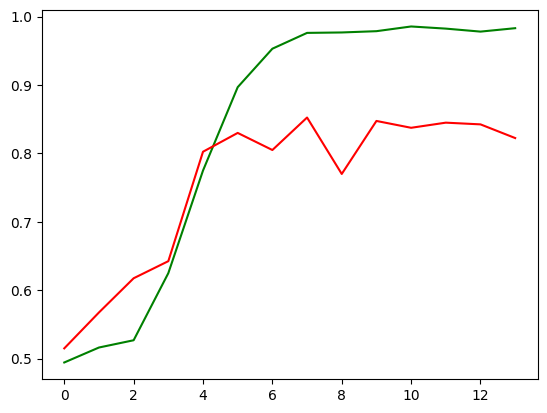

In [31]:
plt.plot(history.history['accuracy'] , c='g')
plt.plot(history.history['val_accuracy'] , c='r')

<font size="3">save tokenizer with pickle</font>


In [32]:
import pickle
with open('tokenizer.h5' , 'wb') as file:
    pickle.dump(tokenizer , file)

In [33]:
with open('data/neg/cv995_23113.txt' , 'rb') as f:
    text = f.read()

print(text)

b'if anything , " stigmata " should be taken as a warning against releasing similarly-themed films relatively close to one another . \nof the four supernatural horror flicks released this year , it is clearly the worst . \ni suppose i should have seen this coming . \nafter all , " blair witch " thoroughly creeped me out , " sixth sense " was mildly spooky , and then " stir of echoes " had its moments , but wasn\'t anything i\'d lose sleep over . \nclearly , the quality of the horror this summer has slowly been dropping . \nis it then any surprise that " stigmata " is the dullest , most horribly executed piece of mtv-influenced tripe i have seen in a long while ? \nno , not really . \npatricia arquette plays frankie page , a hairdresser from pittsburgh who receives a rosary as a gift from her globe-trotting mother . \nas it turns out , the rosary belonged to a recently-deceased brazilian priest . \nthe priest\'s church had been under investigation by father andrew kiernan ( gabriel byrn

<font size="3">load tokenizer and model for prediction</font>

In [34]:
import pickle
with open('tokenizer.h5' , 'rb') as file:
    tokenizer = pickle.load(file)

model = load_model('best_text_model2.h5')
model

In [35]:
text_for_predict = []
with open('data/pos/' + 'cv011_12166.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 142ms/step
Positive text with probability : 0.9994838833808899


In [36]:
text_for_predict = []
with open('data/pos/' + 'cv981_14989.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 15ms/step
Positive text with probability : 0.9970847964286804


In [37]:
text_for_predict = []
with open('data/pos/' + 'cv998_14111.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 5ms/step
Positive text with probability : 0.9857466220855713


In [38]:
text_for_predict = []
with open('data/pos/' + 'cv993_29737.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 16ms/step
Positive text with probability : 0.9915589094161987


In [39]:
text_for_predict = []
with open('data/neg/' + 'cv014_15600.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 2ms/step
Negative text with probability : 0.11617100238800049


In [40]:
text_for_predict = []
with open('data/neg/' + 'cv964_5794.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 15ms/step
Negative text with probability : 0.30887842178344727


In [41]:
text_for_predict = []
with open('data/neg/' + 'cv973_10171.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 21ms/step
Negative text with probability : 0.07500949501991272


In [42]:
text_for_predict = []
with open('data/pos/' + 'cv555_23922.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 5ms/step
Positive text with probability : 0.9447874426841736


In [43]:
text_for_predict = []
with open('1.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 19ms/step
Negative text with probability : 0.4285392165184021


In [44]:
text_for_predict = []
with open('2.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 6ms/step
Negative text with probability : 0.4911026060581207


In [45]:
text_for_predict = []
with open('3.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 9ms/step
Negative text with probability : 0.3123626112937927


In [46]:
text_for_predict = []
with open('4.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 4ms/step
Positive text with probability : 0.6796380877494812


In [47]:
text_for_predict = []
with open('5.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 16ms/step
Negative text with probability : 0.4190685451030731


In [48]:
text_for_predict = []
with open('6.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 19ms/step
Positive text with probability : 0.7258843183517456


In [49]:
text = 'hello ! you are best man am happy you have me '

tokens = word_tokenize(text)
translator = str.maketrans('', '', punctuation)
tokens = [w.translate(translator) for w in tokens]
tokens = [w for w in tokens if not w in stop_words]
text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 19ms/step
Positive text with probability : 0.7258842587471008


In [50]:
text_for_predict = []
with open('7.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 2ms/step
Positive text with probability : 0.6330989599227905


In [51]:
text_for_predict = []
with open('8.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 19ms/step
Positive text with probability : 0.6033143401145935


In [52]:
text_for_predict = []
with open('9.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 19ms/step
Negative text with probability : 0.3571424186229706


In [53]:
text_for_predict = []
with open('10.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 5ms/step
Negative text with probability : 0.44375115633010864


In [54]:
text_for_predict = []
with open('11.txt') as f:
    text = f.read()
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    text_for_predict.append(' '.join(tokens))
encoded = tokenizer.texts_to_sequences(text_for_predict)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')
prediction =model.predict([padded])
if prediction[0][0] > 0.5:
    print(f'Positive text with probability : {prediction[0][0]}')
else:
    print(f'Negative text with probability : {prediction[0][0]}')

1/1 [==============================] - 0s 18ms/step
Negative text with probability : 0.49066656827926636


In [55]:
def prediction_text(text):
    with open(text) as f :
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        text_for_predict.append(' '.join(tokens))
        encoded = tokenizer.texts_to_sequences(text_for_predict)
        padded = pad_sequences(encoded, maxlen=max_len, padding='post')
        prediction =model.predict([padded])
        if prediction[0][0] > 0.5:
            print(f'Positive text with probability : {prediction[0][0]}')
        else:
            print(f'Negative text with probability : {prediction[0][0]}')